In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cmdline_provenance as cmdprov
import cmocean

import pr_climatology as prclim

In [2]:
pr_file = 'pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc'
season = 'JJA'
outfile = 'notebook_figure.png'

In [3]:
dset = xr.open_dataset(pr_file)
new_log = cmdprov.new_log(infile_logs={pr_file: dset.attrs['history']})
print(new_log)

Mon May 17 14:07:23 2021: /Users/irv033/opt/anaconda3/envs/pyaos-lesson/bin/jupyter notebook /Users/irv033/Desktop/demo/pr_climatology.ipynb
Tue Jan 12 14:50:25 2021: ncatted -O -a history,pr,d,, pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc
Tue Jan 12 14:49:25 2021: cdo seldate,2010-01-01,2014-12-31 /g/data/fs38/publications/CMIP6/CMIP/CSIRO-ARCCSS/ACCESS-CM2/historical/r1i1p1f1/Amon/pr/gn/latest/pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_185001-201412.nc pr_Amon_ACCESS-CM2_historical_r1i1p1f1_gn_201001-201412.nc
2019-11-08T08:26:37Z ; CMOR rewrote data to be consistent with CMIP6, CF-1.7 CMIP-6.2 and CF standards.


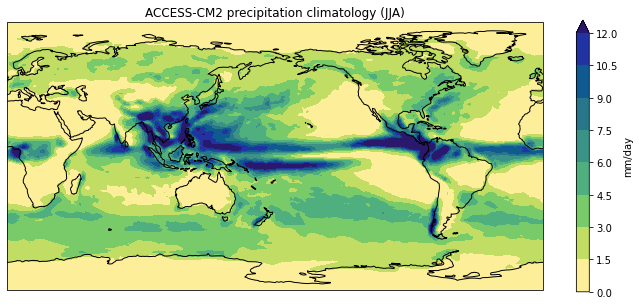

In [4]:
clim = dset['pr'].groupby('time.season').mean('time', keep_attrs=True)
clim = prclim.convert_pr_units(clim)

prclim.create_plot(clim, dset.attrs['source_id'], season)

plt.savefig(outfile, metadata={'History': new_log}, dpi=200)